In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print("Path to dataset files:", path)

/workspace/intel-image-classification/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2


In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import shutil
import os

source_path = "/root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2"
target_path = os.path.join(os.getcwd(), "data", "intel-image-classification")

# copy only once
if not os.path.exists(target_path):
    shutil.copytree(source_path, target_path)
    print("Dataset copied to project data folder")
else:
    print("Dataset already exists")


Dataset already exists


In [9]:
from tensorflow.keras.preprocessing.image import load_img

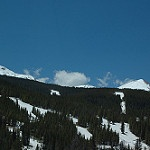

In [8]:
path = './data/intel-image-classification/seg_train/seg_train/mountain'
name = '17.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [9]:
img = load_img(fullname, target_size=(299, 299))

In [10]:
x = np.array(img)
x.shape

(299, 299, 3)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [12]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

I0000 00:00:1768896579.186849   37816 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10270 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:04:00.0, compute capability: 8.6


In [13]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [14]:
X = preprocess_input(X)

In [15]:
pred = model.predict(X)

2026-01-20 08:09:45.918300: I external/local_xla/xla/service/service.cc:163] XLA service 0x7fd95c0028f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-20 08:09:45.918329: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2026-01-20 08:09:45.995669: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-20 08:09:46.542044: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90800
2026-01-20 08:09:47.992552: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 08:09:48.107061: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


I0000 00:00:1768896590.618904   37926 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [16]:
decode_predictions(pred)

[[('n09193705', 'alp', np.float32(0.5768603)),
  ('n04228054', 'ski', np.float32(0.076593556)),
  ('n04252077', 'snowmobile', np.float32(0.052797228)),
  ('n03218198', 'dogsled', np.float32(0.05064702)),
  ('n03792972', 'mountain_tent', np.float32(0.036409717))]]

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2026-01-20 12:54:56.696021: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
input_size = 150

In [19]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_ds = train_gen.flow_from_directory(
    './data/intel-image-classification/seg_train/seg_train/',
    target_size=(input_size, input_size),
    batch_size=32,
    subset='training'
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

val_ds = val_gen.flow_from_directory(
    './data/intel-image-classification/seg_train/seg_train/',
    target_size=(input_size, input_size),
    batch_size=32,
    subset='validation',
    shuffle=False
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


In [20]:
print(type(train_ds))


<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>


In [21]:
train_ds.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [22]:
X, y = next(train_ds)

In [23]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(6)(vectors)

model = keras.Model(inputs, outputs)

In [24]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [25]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


2026-01-20 08:10:23.433877: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 08:10:23.555545: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 08:10:24.006565: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 08:10:24.116921: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 08:10:24.603712: E external/local_xla/xla/stream_

118/351 ━━━━━━━━━━━━━━━━━━━━ 34s 147ms/step - accuracy: 0.7844 - loss: 0.7226

2026-01-20 08:10:48.321996: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 08:10:48.442651: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 08:10:48.889141: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 08:10:48.998960: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 08:10:49.462410: E external/local_xla/xla/stream_

351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.8247 - loss: 0.6167

2026-01-20 08:11:36.115981: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 08:11:36.232720: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 08:11:36.599554: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 08:11:36.708611: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 08:11:37.128476: E external/local_xla/xla/stream_

351/351 ━━━━━━━━━━━━━━━━━━━━ 84s 206ms/step - accuracy: 0.8569 - loss: 0.5319 - val_accuracy: 0.8655 - val_loss: 0.5568
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 160ms/step - accuracy: 0.8754 - loss: 0.5325 - val_accuracy: 0.8773 - val_loss: 0.5435
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.8871 - loss: 0.4714 - val_accuracy: 0.8859 - val_loss: 0.5723
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 58s 165ms/step - accuracy: 0.8908 - loss: 0.4594 - val_accuracy: 0.8688 - val_loss: 0.6581
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 55s 158ms/step - accuracy: 0.8992 - loss: 0.4075 - val_accuracy: 0.8827 - val_loss: 0.5345
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 162ms/step - accuracy: 0.8995 - loss: 0.4249 - val_accuracy: 0.8673 - val_loss: 0.7502
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 58s 164ms/step - accuracy: 0.9053 - loss: 0.4119 - val_accuracy: 0.8730 - val_loss: 0.6472
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 58s 164ms/step - accuracy: 0.9093 - loss: 0.3752 - val

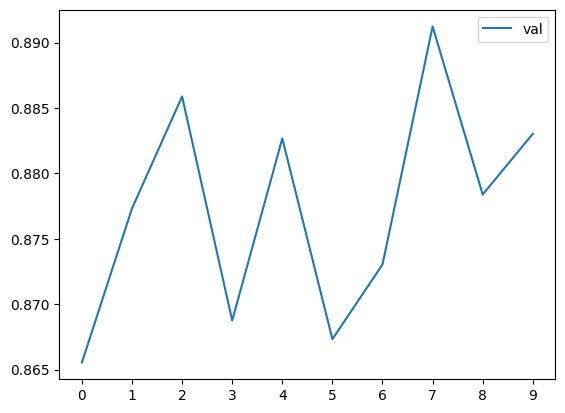

In [26]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [27]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(6)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [28]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 71s 186ms/step - accuracy: 0.7053 - loss: 0.9315 - val_accuracy: 0.8516 - val_loss: 0.5151
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 58s 164ms/step - accuracy: 0.8643 - loss: 0.4501 - val_accuracy: 0.8741 - val_loss: 0.3827
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 54s 155ms/step - accuracy: 0.8809 - loss: 0.3644 - val_accuracy: 0.8841 - val_loss: 0.3377
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 55s 156ms/step - accuracy: 0.8856 - loss: 0.3339 - val_accuracy: 0.8873 - val_loss: 0.3166
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 55s 157ms/step - accuracy: 0.8934 - loss: 0.3103 - val_accuracy: 0.8937 - val_loss: 0.3014
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 160ms/step - accuracy: 0.8949 - loss: 0.3000 - val_accuracy: 0.8941 - val_loss: 0.2925
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 163ms/step - accuracy: 0.8983 - loss: 0.2859 - val_accuracy: 0.8969 - val_loss: 0.2859
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 163ms/step - accuracy: 0.8992 - 

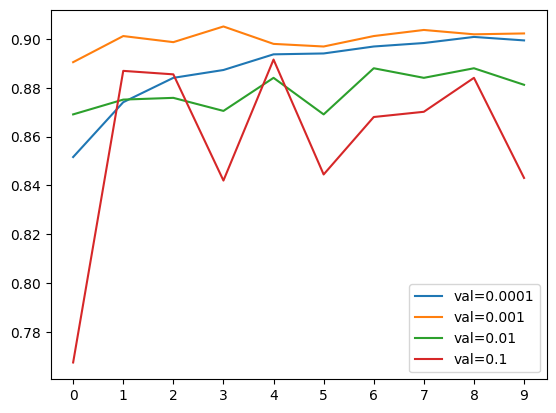

In [29]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [30]:
learning_rate = 0.001

In [31]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(6)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [32]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 75s 191ms/step - accuracy: 0.8524 - loss: 0.4133 - val_accuracy: 0.8905 - val_loss: 0.3042
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 160ms/step - accuracy: 0.8987 - loss: 0.2762 - val_accuracy: 0.9005 - val_loss: 0.2732
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.9041 - loss: 0.2580 - val_accuracy: 0.9001 - val_loss: 0.2757
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.9140 - loss: 0.2376 - val_accuracy: 0.9012 - val_loss: 0.2663
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 58s 164ms/step - accuracy: 0.9130 - loss: 0.2277 - val_accuracy: 0.8969 - val_loss: 0.2781
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 58s 165ms/step - accuracy: 0.9186 - loss: 0.2176 - val_accuracy: 0.8959 - val_loss: 0.2772
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 55s 155ms/step - accuracy: 0.9236 - loss: 0.2096 - val_accuracy: 0.9023 - val_loss: 0.2623
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 159ms/step - accuracy: 0.9242 - loss

2026-01-20 09:23:46.958349: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-20 09:23:49.016954: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4237', 68 bytes spill stores, 68 bytes spill loads



351/351 ━━━━━━━━━━━━━━━━━━━━ 76s 191ms/step - accuracy: 0.8694 - loss: 0.3547 - val_accuracy: 0.8855 - val_loss: 0.2961
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 161ms/step - accuracy: 0.8978 - loss: 0.2702 - val_accuracy: 0.8934 - val_loss: 0.2944
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 159ms/step - accuracy: 0.9113 - loss: 0.2367 - val_accuracy: 0.9058 - val_loss: 0.2693
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 163ms/step - accuracy: 0.9189 - loss: 0.2176 - val_accuracy: 0.8944 - val_loss: 0.3011
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 160ms/step - accuracy: 0.9236 - loss: 0.1974 - val_accuracy: 0.8948 - val_loss: 0.2813
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 164ms/step - accuracy: 0.9278 - loss: 0.1881 - val_accuracy: 0.8980 - val_loss: 0.2770
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 58s 164ms/step - accuracy: 0.9306 - loss: 0.1801 - val_accuracy: 0.9019 - val_loss: 0.2728
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 162ms/step - accuracy: 0.9323 - loss: 0.1728 - val

2026-01-20 09:33:35.409928: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-20 09:33:37.797758: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3793', 24 bytes spill stores, 24 bytes spill loads

2026-01-20 09:33:38.661332: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4237', 68 bytes spill stores, 68 bytes spill loads



265/351 ━━━━━━━━━━━━━━━━━━━━ 12s 151ms/step - accuracy: 0.8177 - loss: 0.5008

2026-01-20 09:34:23.820222: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3800', 4 bytes spill stores, 4 bytes spill loads

2026-01-20 09:34:23.902725: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3793', 56 bytes spill stores, 56 bytes spill loads

2026-01-20 09:34:24.074101: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3800', 32 bytes spill stores, 32 bytes spill loads

2026-01-20 09:34:24.242745: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3800', 32 bytes spill stores, 32 bytes spill loads



351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.8295 - loss: 0.4690

2026-01-20 09:34:47.524306: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1093', 4 bytes spill stores, 4 bytes spill loads

2026-01-20 09:34:47.893417: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1086', 56 bytes spill stores, 56 bytes spill loads

2026-01-20 09:34:47.945934: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1093', 32 bytes spill stores, 32 bytes spill loads

2026-01-20 09:34:48.128014: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1093', 32 bytes spill stores, 32 bytes spill loads



351/351 ━━━━━━━━━━━━━━━━━━━━ 79s 197ms/step - accuracy: 0.8692 - loss: 0.3618 - val_accuracy: 0.8898 - val_loss: 0.2892
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 160ms/step - accuracy: 0.8972 - loss: 0.2752 - val_accuracy: 0.9048 - val_loss: 0.2790
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 160ms/step - accuracy: 0.9099 - loss: 0.2398 - val_accuracy: 0.8951 - val_loss: 0.2936
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 58s 164ms/step - accuracy: 0.9164 - loss: 0.2197 - val_accuracy: 0.9016 - val_loss: 0.2642
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 159ms/step - accuracy: 0.9221 - loss: 0.2076 - val_accuracy: 0.8976 - val_loss: 0.2950
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 159ms/step - accuracy: 0.9279 - loss: 0.1920 - val_accuracy: 0.8984 - val_loss: 0.2951
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 58s 165ms/step - accuracy: 0.9272 - loss: 0.1834 - val_accuracy: 0.8762 - val_loss: 0.3454
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 58s 166ms/step - accuracy: 0.9370 - loss: 0.1620 - val

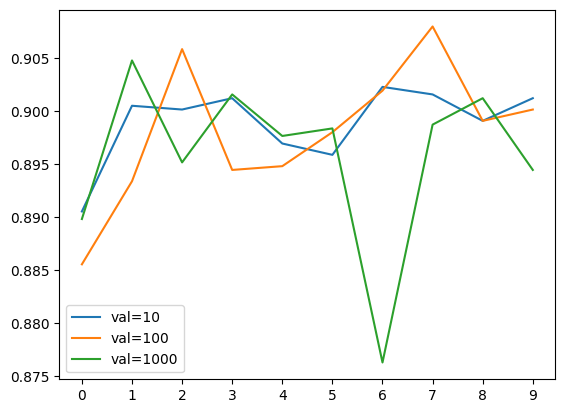

In [33]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks()
plt.legend()

In [34]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(6)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [35]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 73s 188ms/step - accuracy: 0.8717 - loss: 0.3556 - val_accuracy: 0.8948 - val_loss: 0.2747
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 58s 166ms/step - accuracy: 0.8975 - loss: 0.2614 - val_accuracy: 0.8955 - val_loss: 0.2870
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 163ms/step - accuracy: 0.9097 - loss: 0.2378 - val_accuracy: 0.9019 - val_loss: 0.2716
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.9176 - loss: 0.2176 - val_accuracy: 0.9041 - val_loss: 0.2693
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 160ms/step - accuracy: 0.9251 - loss: 0.2041 - val_accuracy: 0.9041 - val_loss: 0.2722
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 160ms/step - accuracy: 0.9254 - loss: 0.1969 - val_accuracy: 0.8948 - val_loss: 0.2864
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 59s 168ms/step - accuracy: 0.9303 - loss: 0.1796 - val_accuracy: 0.9073 - val_loss: 0.2674
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 163ms/step - accuracy: 0.9360 - loss: 0

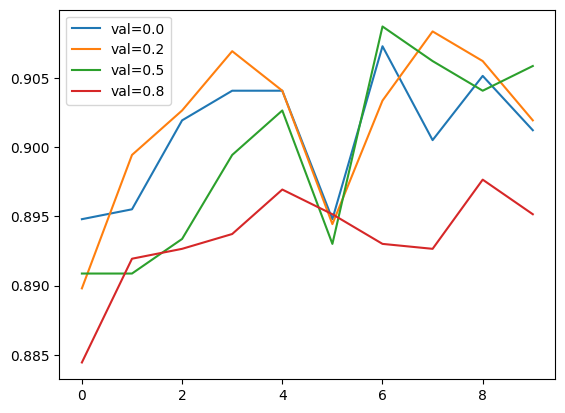

In [36]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim()
plt.legend()

In [16]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.2):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(6)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [3]:
input_size = 299

In [11]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_ds = train_gen.flow_from_directory(
    './data/intel-image-classification/seg_train/seg_train/',
    target_size=(input_size, input_size),
    batch_size=32,
    subset='training'
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

val_ds = val_gen.flow_from_directory(
    './data/intel-image-classification/seg_train/seg_train/',
    target_size=(input_size, input_size),
    batch_size=32,
    subset='validation',
    shuffle=False
)

Found 11230 images belonging to 6 classes.


Found 2804 images belonging to 6 classes.


In [19]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [22]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=20, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/20


2026-01-20 13:09:57.955054: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-20 13:09:59.892150: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4599', 68 bytes spill stores, 68 bytes spill loads

2026-01-20 13:10:04.895492: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 13:10:05.097600: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please i

 12/351 ━━━━━━━━━━━━━━━━━━━━ 2:38 467ms/step - accuracy: 0.4459 - loss: 1.4667

2026-01-20 13:10:24.801516: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 13:10:24.996824: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 13:10:26.419776: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 13:10:26.586306: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 13:10:27.593390: E external/local_xla/xla/stream_

351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.8244 - loss: 0.4804

2026-01-20 13:13:36.978583: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 13:13:37.147736: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 13:13:38.209214: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 13:13:38.360297: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 13:13:39.116394: E external/local_xla/xla/stream_

351/351 ━━━━━━━━━━━━━━━━━━━━ 230s 601ms/step - accuracy: 0.8768 - loss: 0.3358 - val_accuracy: 0.9094 - val_loss: 0.2364
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.9108 - loss: 0.2482

351/351 ━━━━━━━━━━━━━━━━━━━━ 185s 527ms/step - accuracy: 0.9110 - loss: 0.2435 - val_accuracy: 0.9187 - val_loss: 0.2219
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 185s 527ms/step - accuracy: 0.9176 - loss: 0.2214 - val_accuracy: 0.9165 - val_loss: 0.2176
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 185s 526ms/step - accuracy: 0.9252 - loss: 0.1984 - val_accuracy: 0.9130 - val_loss: 0.2243
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 186s 529ms/step - accuracy: 0.9300 - loss: 0.1869 - val_accuracy: 0.9141 - val_loss: 0.2179
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.9240 - loss: 0.1893

351/351 ━━━━━━━━━━━━━━━━━━━━ 185s 527ms/step - accuracy: 0.9258 - loss: 0.1877 - val_accuracy: 0.9194 - val_loss: 0.2239
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.9333 - loss: 0.1748

351/351 ━━━━━━━━━━━━━━━━━━━━ 186s 530ms/step - accuracy: 0.9344 - loss: 0.1737 - val_accuracy: 0.9219 - val_loss: 0.2239
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 185s 527ms/step - accuracy: 0.9333 - loss: 0.1671 - val_accuracy: 0.9194 - val_loss: 0.2169
Epoch 9/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 185s 525ms/step - accuracy: 0.9390 - loss: 0.1608 - val_accuracy: 0.9219 - val_loss: 0.2179
Epoch 10/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 185s 527ms/step - accuracy: 0.9404 - loss: 0.1571 - val_accuracy: 0.9058 - val_loss: 0.2520
Epoch 11/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 185s 527ms/step - accuracy: 0.9411 - loss: 0.1527 - val_accuracy: 0.9212 - val_loss: 0.2228
Epoch 12/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.9446 - loss: 0.1398

351/351 ━━━━━━━━━━━━━━━━━━━━ 185s 527ms/step - accuracy: 0.9437 - loss: 0.1477 - val_accuracy: 0.9230 - val_loss: 0.2120
Epoch 13/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 182s 518ms/step - accuracy: 0.9476 - loss: 0.1429 - val_accuracy: 0.9226 - val_loss: 0.2105
Epoch 14/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 186s 528ms/step - accuracy: 0.9447 - loss: 0.1440 - val_accuracy: 0.9198 - val_loss: 0.2298
Epoch 15/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 184s 524ms/step - accuracy: 0.9448 - loss: 0.1392 - val_accuracy: 0.9215 - val_loss: 0.2207
Epoch 16/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 185s 528ms/step - accuracy: 0.9497 - loss: 0.1285 - val_accuracy: 0.9212 - val_loss: 0.2202
Epoch 17/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.9525 - loss: 0.1230

351/351 ━━━━━━━━━━━━━━━━━━━━ 185s 527ms/step - accuracy: 0.9508 - loss: 0.1280 - val_accuracy: 0.9248 - val_loss: 0.2174
Epoch 18/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 185s 527ms/step - accuracy: 0.9503 - loss: 0.1267 - val_accuracy: 0.9198 - val_loss: 0.2463
Epoch 19/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 183s 521ms/step - accuracy: 0.9501 - loss: 0.1279 - val_accuracy: 0.9230 - val_loss: 0.2208
Epoch 20/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 185s 526ms/step - accuracy: 0.9517 - loss: 0.1215 - val_accuracy: 0.9183 - val_loss: 0.2468


In [12]:
import tensorflow as tf
from tensorflow import keras

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [24]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './data/intel-image-classification/seg_test/seg_test/',
    target_size=(299, 299),
    batch_size=16,
    shuffle=False
)

Found 3000 images belonging to 6 classes.


In [25]:
model = keras.models.load_model('xception_v4_1_12_0.923.h5')

In [26]:
model.evaluate(test_ds)

188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.9293 - loss: 0.1983


[0.19825434684753418, 0.9293333292007446]